In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords

In [2]:
df_st = pd.read_excel('1000 leads.xlsx')

In [3]:
del(df_st['Unnamed: 4'])

In [4]:
df_st['Status '] = df_st['Status '].str.lower()
df_st['Status '] = df_st['Status '].str.strip(" ")

In [5]:
df_st = df_st.dropna()

In [6]:
def message_text_process(mess):
    no_punctuation = [char for char in mess if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word.lower() 
            not in stopwords.words('english')]

In [7]:
sentences = df_st['Status information'].apply(message_text_process)

In [9]:
from gensim.models import Word2Vec

In [91]:
model = Word2Vec(sen, min_count=3)

In [92]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [95]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/home/tushar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


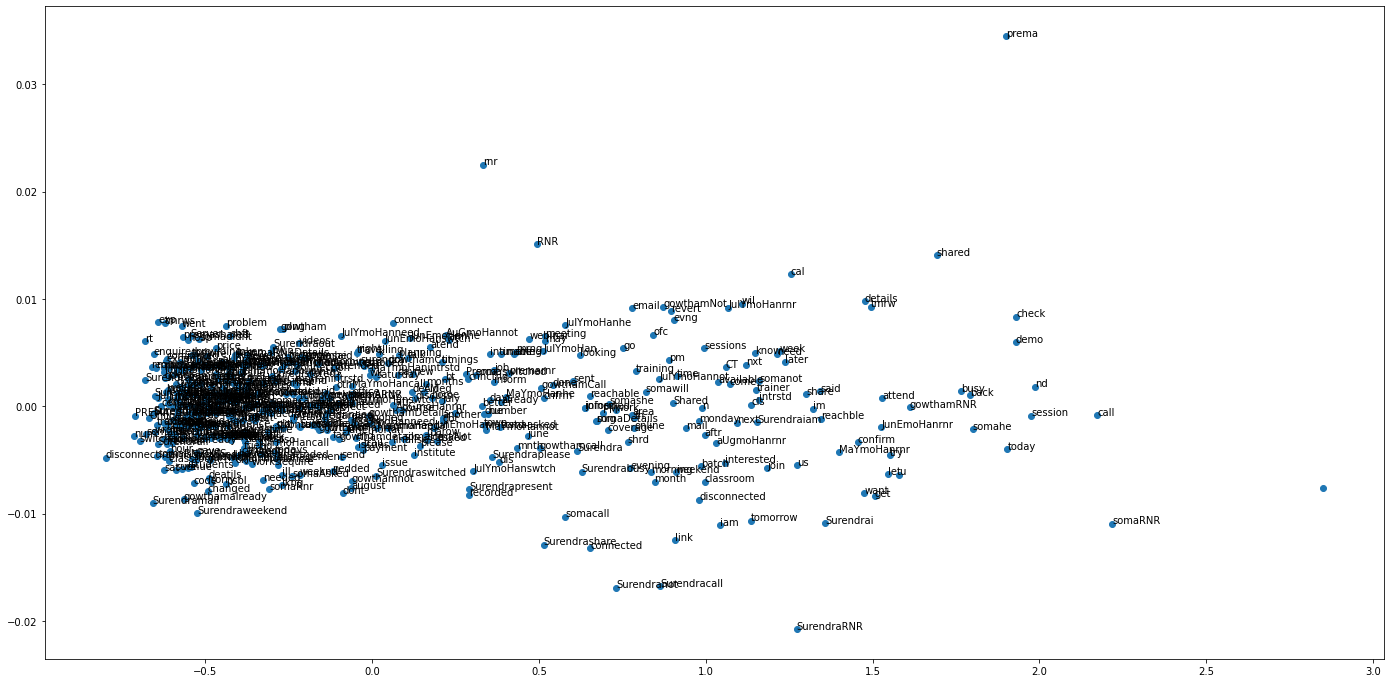

In [96]:
pyplot.figure(figsize=(24,12))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [97]:
import re 
listns=[]
def remove(list): 
    pattern = '[0-9]'
    lista = [re.sub(pattern, '', i) for i in list]
    listns.append(lista)
for k in sentences.keys():
    remove(sentences[k])
        

In [98]:
sen=pd.Series(listns)

In [99]:
sen

0      [prema, share, details, available, evng, prema...
1      [prema, cal, tmrw, shared, details, email, pre...
2                                          [AuGmoHanrnr]
3      [Surendrai, want, Server, AuGmoHancal, busy, A...
4      [premarnr, prema, gave, info, said, revert, hr...
                             ...                        
951    [Surendraplease, send, details, tomorrow, afte...
952    [prema, need, CT, venue, far, shared, details,...
953    [AprmoHanintrstd, evng, batch, trail, perd, Ap...
954    [Surendraplease, share, details, gowthamalread...
955    [prema, shared, details, need, Cert, prema, ne...
Length: 956, dtype: object